In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.1MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 194kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 7.5MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *


import warnings
warnings.filterwarnings("ignore")

import requests

import PIL.Image

from io import BytesIO
import os

from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
#Se crea una carpeta
try:
  os.mkdir('imagenes')
except:
    pass

In [ ]:
llave = "b64d7ffd31104508ba40f184bbfea272"
ruta_busquedas = "https://api.bing.microsoft.com/v7.0/images/search"
encabezado = {"Ocp-Apim-Subscription-Key": llave}

In [ ]:
busqueda ='fresa'
parametros = {'q':busqueda,"license":"public","imageType":"photo",'count':'150'}

In [ ]:
respuesta = requests.get(ruta_busquedas,headers=encabezado, params=parametros)
respuesta.raise_for_status()

In [ ]:
respuesta_busqueda = respuesta.json()
thumbnail_urls = [img["thumbnailUrl"] for img in respuesta_busqueda["value"][:25]]

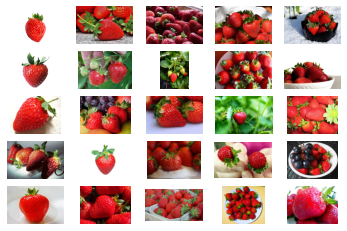

In [ ]:
f, ejes =plt.subplots(5,5)
for i in range (5):
  for j in range(5):
      imagen = requests.get(thumbnail_urls[i+5*j])
      imagen.raise_for_status()
      imagen_2 =PIL.Image.open(BytesIO(imagen.content))
      ejes[i][j].imshow(imagen_2)
      ejes[i][j].axis('off')
plt.show()

In [ ]:
url_imagenes =[img['contentUrl'] for img in respuesta_busqueda["value"]]
len(url_imagenes)

150

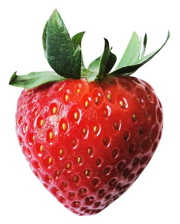

In [ ]:
destino ='imagenes/fresitas.jpg'
download_url(url_imagenes[1],destino)
img=PIL.Image.open(destino)
img.to_thumb(224,224)

In [ ]:
tipo_fruta =['fresa','tomate','dragon fruit']
ruta = Path('frutas')

In [ ]:
if not ruta.exists():
  ruta.mkdir()
  for fruta in tipo_fruta:
    destino= (ruta/fruta)
    destino.mkdir(exist_ok=True)

    busqueda = fruta
    parametros ={"q":busqueda,"license":"public","imageType":"photo","count":"50"}
    respuesta = requests.get(ruta_busquedas,headers =encabezado,params=parametros)
    respuesta.raise_for_status()
    respuesta_busqueda = respuesta.json()
    url_imagenes = [img['contentUrl'] for img in respuesta_busqueda["value"]]
    download_images(destino,urls=url_imagenes)

In [ ]:
archivos_imagen =get_image_files(ruta)
archivos_imagen

(#119) [Path('frutas/dragon fruit/00000048.jpg'),Path('frutas/dragon fruit/00000026.jpg'),Path('frutas/dragon fruit/00000021.jpg'),Path('frutas/dragon fruit/00000039.jpg'),Path('frutas/dragon fruit/00000032.jpg'),Path('frutas/dragon fruit/00000002.jpg'),Path('frutas/dragon fruit/00000044.jpg'),Path('frutas/dragon fruit/00000013.jpg'),Path('frutas/dragon fruit/00000047.jpg'),Path('frutas/dragon fruit/00000000.jpeg')...]

In [ ]:
fallidos = verify_images(archivos_imagen)
fallidos

(#46) [Path('frutas/dragon fruit/00000032.jpg'),Path('frutas/dragon fruit/00000002.jpg'),Path('frutas/dragon fruit/00000044.jpg'),Path('frutas/dragon fruit/00000013.jpg'),Path('frutas/dragon fruit/00000004.jpg'),Path('frutas/dragon fruit/00000015.jpg'),Path('frutas/dragon fruit/00000024.jpg'),Path('frutas/dragon fruit/00000028.jpg'),Path('frutas/dragon fruit/00000030.jpg'),Path('frutas/dragon fruit/00000022.jpg')...]

In [ ]:
fallidos.map(Path.unlink)

(#46) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
frutitas = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=1),
    get_y = parent_label,
    item_tfms=Resize(128))


In [ ]:
cdd = frutitas.dataloaders(ruta)

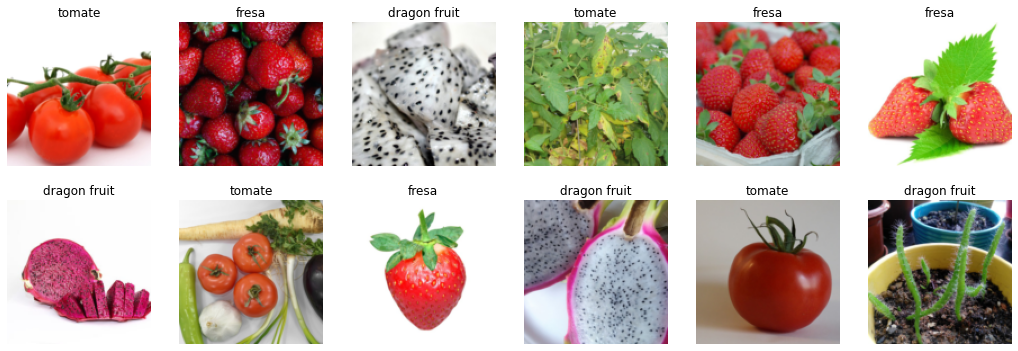

In [ ]:
cdd.valid.show_batch(max_n=12,nrows=2)

In [ ]:
frutitas = frutitas.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
cdd = frutitas.dataloaders(ruta)
cdd.train.show_batch(max_n=8,nrows=2,unique=True)

KeyError: ignored

In [ ]:
frutitas = frutitas.new(item_tfms=Resize(128),
                        batch_tfms=aug_transforms())
cdd=frutitas.dataloaders(ruta)
#cdd.train.show_batch(max_n=8,nrows=2,unique=True)

In [ ]:
frutitas = frutitas.new (item_tfms=RandomResizedCrop(224,min_scale=0.5),
                         batch_tfms=aug_transforms())
cdd = frutitas.dataloaders(ruta)

In [ ]:
learn = cnn_learner(cdd, resnet34, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


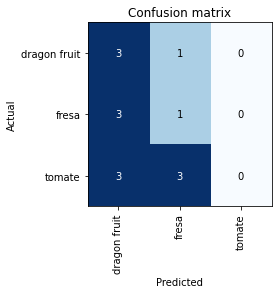

In [ ]:
matriz =ClassificationInterpretation.from_learner(learn)
matriz.plot_confusion_matrix()

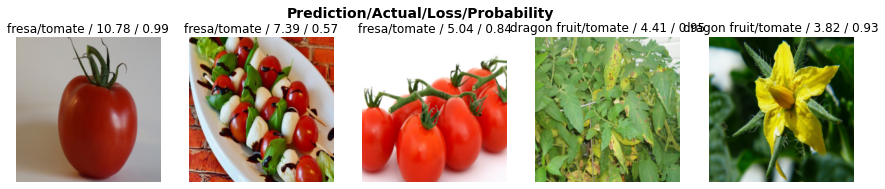

In [ ]:
matriz.plot_top_losses(5,nrows=1)

In [ ]:
limpiador =ImageClassifierCleaner(learn)
limpiador

In [ ]:
for a in limpiador.delete(): limpiador.fns[a].unlink()


In [ ]:
cdd = frutitas.dataloaders(ruta)
aprende = cnn_learner(cdd, resnet34, metrics=error_rate)
aprende.fine_tune(4)

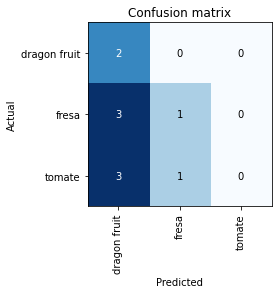

In [ ]:
revision = ClassificationInterpretation.from_learner(aprende)
revision.plot_confusion_matrix()

In [ ]:
aprende.export()
ruta = Path()
ruta.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
aprendizaje = load_learner(ruta/'export.pkl')

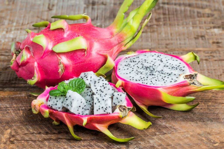

In [ ]:
 ims =['https://chefjames.com/wp-content/uploads/2018/05/fruta-del-dragon2.jpg']
 dest ='imagenes/test_pitahaya.jpg'
 download_url(ims[0], dest)

 im = PIL.Image.open(dest)
 im.to_thumb(224,224)

In [ ]:
aprendizaje.predict('imagenes/test_pitahaya.jpg')

('dragon fruit', tensor(0), tensor([0.9607, 0.0383, 0.0010]))

In [ ]:
boton_carga = widgets.FileUpload()
boton_carga

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(boton_carga.data[-1])

In [ ]:
salida = widgets.Output()
salida.clear_output()
with salida: display(img.to_thumb(224,224))
salida

Output()

In [ ]:
pred, pred_ind,probs =aprendizaje.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value= f'Predicción: {pred}; Probabilidad: {probs[pred_ind]:.04f}'
lbl_pred

Label(value='Predicción: dragon fruit; Probabilidad: 0.9962')

In [ ]:
boton_ejec = widgets.Button(description= 'Clasifica!')
boton_ejec


Button(description='Clasifica!', style=ButtonStyle())

In [ ]:
def clasifica_boton(change):
  img = PILImage.create(boton_carga.data[-1])
  salida.clear_output()
  with salida: display(img.to_thumb(128,128))
  pred,pred_ind,probs =aprendizaje.predict(img)
  lbl_pred.value =f'Prediction: {pred}; Probability:{probs[pred_ind]:.04f}'

  boton_ejec.on_click(clasifica_boton)

In [ ]:
VBox([widgets.Label('Escoje la fruta'), boton_carga, boton_ejec,lbl_pred])

# New Section